### **Building a Machine Learning workflow (MLOPs) to predict housing prices using the `California Housing dataset`**

#### **1. Loading Data**

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [2]:
# Loading the data
california = fetch_california_housing()
housing_df = pd.concat([pd.DataFrame(california.data, columns=california.feature_names), pd.DataFrame(california.target, columns=['MedianHouseValue'])], axis=1)

#### **2. Exploring Data**

In [3]:
# Top 5 rows
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# Bottom 5 rowa
housing_df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [5]:
# Technical information of the data
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MedInc            20640 non-null  float64
 1   HouseAge          20640 non-null  float64
 2   AveRooms          20640 non-null  float64
 3   AveBedrms         20640 non-null  float64
 4   Population        20640 non-null  float64
 5   AveOccup          20640 non-null  float64
 6   Latitude          20640 non-null  float64
 7   Longitude         20640 non-null  float64
 8   MedianHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
# Rows and columns of the data
housing_df.shape

(20640, 9)

##### **Data Visualization**

**Investigating the relationship between variables**

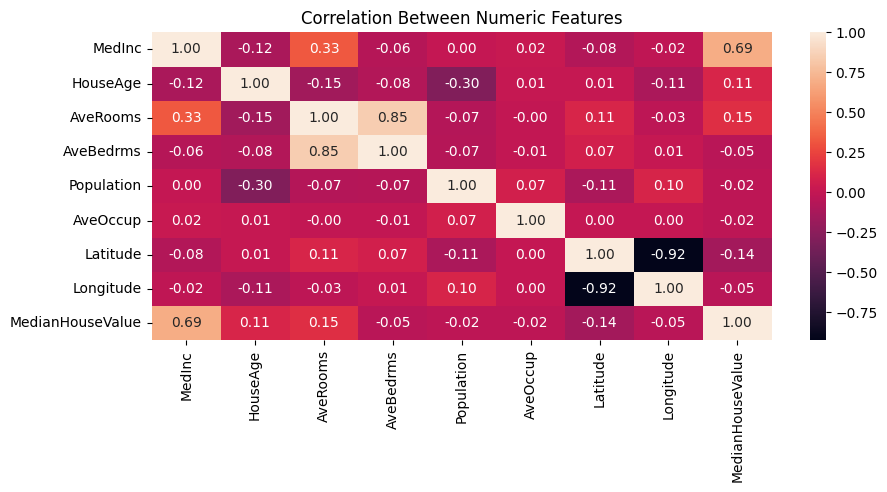

In [7]:
plt.figure(figsize=(10,4))
sns.heatmap(data=housing_df.corr(), annot=True, annot_kws={'size':10}, fmt='.2f')
plt.title("Correlation Between Numeric Features")
plt.show()

**Investigating Linear Relationships among features**

In [8]:
# g = sns.pairplot(data=housing_df, height=0.5, aspect=2.5)
# for i, ax in enumerate(g.axes[:, 0]):
#     if ax is not None:
#         ax.set_ylabel(ax.get_ylabel(), rotation=90, ha='right')
# plt.show()

**Checking the distribution of median house values**

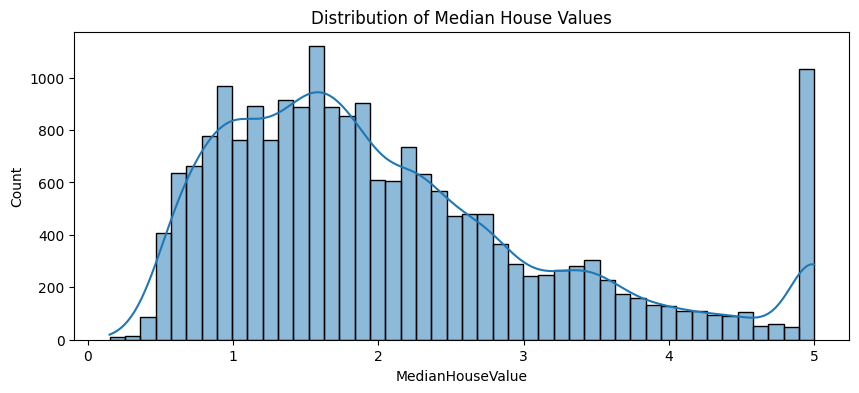

In [8]:
plt.figure(figsize=(10, 4))
sns.histplot(data = housing_df, x = 'MedianHouseValue', kde=True)
plt.title("Distribution of Median House Values")
plt.show()

#### **3. Data Preparation**

**Checking if the data has outliers**

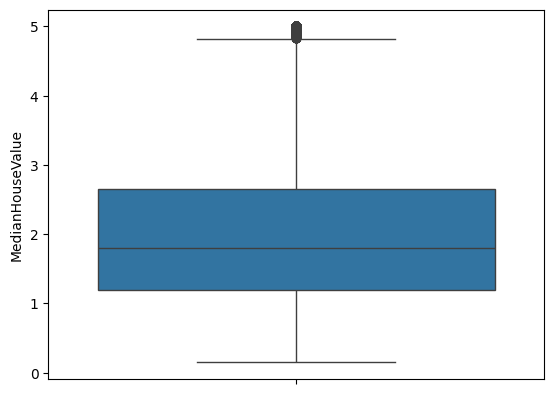

In [9]:
plt.figure()
sns.boxplot(data=housing_df, y = 'MedianHouseValue')
plt.show()

In [10]:
q1 = np.percentile(housing_df["MedianHouseValue"], 25)
q3 = np.percentile(housing_df["MedianHouseValue"], 75)
iqr = q3 - q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr
# housing_df[housing_df['MedianHouseValue']<= lower]
housing_df[housing_df['MedianHouseValue']>= upper].head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
89,1.2434,52.0,2.929412,0.917647,396.0,4.658824,37.80,-122.27,5.00001
140,6.3624,30.0,5.615385,0.730769,126.0,2.423077,37.81,-122.18,4.83300
459,1.1696,52.0,2.436000,0.944000,1349.0,5.396000,37.87,-122.25,5.00001
489,3.0417,48.0,4.690632,1.126362,1656.0,3.607843,37.86,-122.25,4.89600
493,7.8521,52.0,7.794393,1.051402,517.0,2.415888,37.86,-122.24,5.00001


There are several outliers in the housing data median house value

In [11]:
df = housing_df.copy().drop(columns = ['MedianHouseValue'])
df['LogValue'] = np.log1p(housing_df['MedianHouseValue'])
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,LogValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,1.709464
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,1.522790
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,1.508733
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,1.484555
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,1.486592


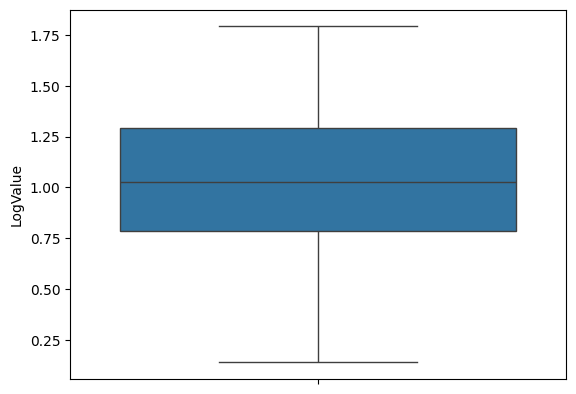

In [12]:
sns.boxplot(data=df, y = 'LogValue')
plt.show()

**Checking Missing Values**

In [13]:
df.isna().sum()[df.isna().sum()!=0]

Series([], dtype: int64)

**Checking if there are duplicates**

In [14]:
df.duplicated().sum()

0

**Splitting Data**

In [62]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df.drop(columns='LogValue')
y = housing_df['MedianHouseValue'] #LogValue

# Creating a pipeline - The data has numeric features only.
numeric_pipeline = Pipeline(steps = [
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy = 'mean'))
])

# Combining preprocessing.
preprocessor = ColumnTransformer(transformers = [('num',numeric_pipeline, X.select_dtypes(include = np.number).columns.to_list())])

# Fit and transform data
X_transformed = preprocessor.fit_transform(X)
X_transformed = pd.DataFrame(X_transformed, columns=X.select_dtypes(include=np.number).columns.to_list())

In [64]:
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=123)

#### **4. Building a Regression Model**

In [65]:
# Import required libraries
from sklearn.metrics import  r2_score

##### **K-Nearest Neighbors (KNN) Model**

In [69]:
# Import the KNeighbors regressor
from sklearn.neighbors import KNeighborsRegressor

# Defining the model
knn_reg = KNeighborsRegressor()

# Training the model
knn_reg.fit(x_train, y_train)

# Making predictions
pred = knn_reg.predict(x_test)

# Evaluating the model
print(f'R2 Score: {round(r2_score(y_test, pred), 4)}')

R2 Score: 0.6906


#### **5. Hyperparameter tuning**
- Here also, 5-fold cross validation is applied.

In [75]:
from sklearn.model_selection import  GridSearchCV, KFold
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import TransformedTargetRegressor

# Adding the output converter to the pipeline
base_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn_reg2', KNeighborsRegressor())
]) 
# Defining K-Fold cross validation
kf = KFold(n_splits = 5, shuffle = True, random_state = 123)

# Defining parameters to search
param_to_search = {
    'regressor__knn_reg2__n_neighbors': [3, 5, 7, 9],
    'regressor__knn_reg2__weights': ['uniform', 'distance'],
    'regressor__knn_reg2__p': [1, 2]
}

final_regressor = TransformedTargetRegressor(
  regressor=base_pipeline,
  func=np.log1p,
  inverse_func=np.expm1
  )

# Applying GridSearchCV
grid = GridSearchCV(estimator = final_regressor, param_grid=param_to_search, cv = kf, scoring='r2', verbose=1, n_jobs=1)

# Fiting the grid to training data
grid.fit(x_train, y_train)

# Obtaining the best parameters and score of the model
print("Optimal Parameters: ", grid.best_params_)
print("Best CV R2 Score: ", grid.best_score_.round(4))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Optimal Parameters:  {'regressor__knn_reg2__n_neighbors': 9, 'regressor__knn_reg2__p': 1, 'regressor__knn_reg2__weights': 'distance'}
Best CV R2 Score:  0.7263


**Evaluating the model on the test set**

In [ ]:
# Making predictions on the test set
predictions = grid.predict(x_test)
# Evaluating the model on the test set
test_score = r2_score(y_test, predictions)
print("The test set R2 Score: ", round(test_score, 4))

The test set R2 Score:  0.7344


#### **6. Exporting the Model for Deployment**

In [83]:
# Importing pickle for saving the model
import pickle
# Save the pipeline
with open('california_knn_model.pkl', 'wb') as m:
  pickle.dump(grid, m)

print("The pipeline has been saved to 'california_knn_model.pkl'")


The pipeline has been saved to 'california_knn_model.pkl'


In [24]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# housing_df.drop(columns=['MedianHouseValue']).to_csv('california_housing_x_data.csv', index=False)